# Setting

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import os
from collections import deque
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir('drive/My Drive/Colab Notebooks/Numeraxial/data_cleaned')
path = os.getcwd()
dir_list = os.listdir(path) 
print("Files and directories in '", path, "' :")  
dir_list.sort()
print(dir_list)

Files and directories in ' /content ' :
['.config', 'drive', 'sample_data']


In [3]:
os.chdir('drive/My Drive/Colab Notebooks/Numeraxial')
path = os.getcwd()
dir_list = os.listdir(path) 
print("Files and directories in '", path, "' :")  
dir_list.sort()
print(dir_list)

Files and directories in ' /content/drive/My Drive/Colab Notebooks/Numeraxial ' :
['Data_gen.ipynb', 'Data_generator.ipynb', 'LM_dict.csv', 'Model.ipynb', 'Practice.ipynb', 'Report.ipynb', 'affectivespace.csv', 'data', 'data_cleaned', 'img']


In [10]:
def up_or_down(dfin):
  now = dfin['Close']
  future = dfin['Future']
  if float(now) > float(future):
    return 0
  else:
    return 1

df = pd.read_csv('AAPL.csv', index_col=0)
# fmt = "%Y-%m-%d %H:%M:%S"
# df.index = df.index.strftime(fmt)
# df.reset_index(inplace=True)
# # df = df.iloc[:,:7]
# df['Future'] = df['Close'].shift(-1)
# df['SMA100'] = df['Close'].rolling(window = 100).mean()
# df['Tartget'] = df.apply(up_or_down, axis=1)
# df['Open_pch'] = df['Open'].pct_change()
# df['High_pch'] = df['High'].pct_change()
# df['Low_pch'] = df['Low'].pct_change()
# df['Close_pch'] = df['Close'].pct_change()
# df['Volume_pch'] = df['Volume'].pct_change()
# df['Future_pch'] = df['Future'].pct_change()

# df = df.iloc[1:,:]
# df.reset_index(inplace=True)
# df.drop(columns='index',inplace=True)
# # df.dropna(axis=0, , inplace=True)
# # df.drop(columns='Future', inplace=True)


split_time = int(df.shape[0]*.8)
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Positive,Negative,Senti
0,AAPL,2017-07-03 09:00:00,144.81,144.81,144.71,144.71,6149.0,870.0,914.0,-1.0
1,AAPL,2017-07-03 09:15:00,144.78,144.84,144.65,144.70,5500.0,0.0,2.0,-1.0
2,AAPL,2017-07-03 09:30:00,144.95,145.15,144.10,145.04,524447.0,0.0,2.0,-1.0
3,AAPL,2017-07-03 09:45:00,144.99,145.24,144.99,145.03,513576.0,0.0,0.0,0.0
4,AAPL,2017-07-03 10:00:00,144.80,144.90,144.59,144.65,292192.0,0.0,0.0,0.0


In [26]:
print(y_data)
print(x_data)

[144.7  145.04 145.03 ... 190.61 190.6     nan]
[[-1.]
 [-1.]
 [-1.]
 ...
 [ 1.]
 [-1.]
 [ 0.]]


In [27]:
y_data = np.array(df['Close'].shift(-1))[:-1]#.reshape(-1,1)
x_data = np.array(df['Senti'][:-1]).reshape(-1,1)
y_train = y_data[:split_time]
x_train = x_data[:split_time]
y_valid = y_data[split_time:-1]
x_valid = x_data[split_time:-1]

rf_model = RandomForestClassifier(random_state=100)
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model_cv = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
rf_model_cv.fit(x_train,y_train)
print(rf_model_cv.best_params_)
print(rf_model_cv.best_score_)


{'max_features': 'auto', 'n_estimators': 100}
-3.792908441045325


In [32]:
rf_model = RandomForestRegressor().set_params(**rf_model_cv.best_params_)
rf_model.fit(x_train,y_train)

prediction = rf_model.predict(x_data)
# df['Future_pred_RF'] = df['Future_pch_predicted_RF'] * df['Close'] + df['Close']

from sklearn.metrics import mean_squared_error

print('R squared coeff for whole data: {}'.format(rf_model.score(x_data,y_data)))
print('R squared coeff for train data: {}'.format(rf_model.score(x_train,y_train)))
print('R squared coeff for test data: {}'.format(rf_model.score(x_valid,y_valid)))
print('------------------------------------')
print('Mean squared error: {}'.format(mean_squared_error(df['Close'].shift(-1).to_numpy()[:-1],prediction)))

R squared coeff for whole data: -0.07782611507701587
R squared coeff for train data: 0.0004261069075351953
R squared coeff for test data: -2.828016925085233
------------------------------------
Mean squared error: 144.61444579030845


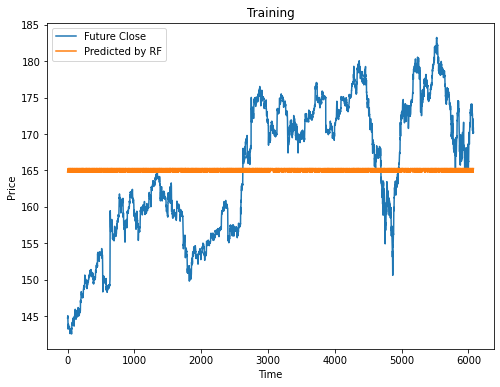

In [33]:
plt.figure(figsize=(8,6))
plt.plot(df['Close'][:split_time], label = 'Future Close')
plt.plot(prediction[:split_time], label = 'Predicted by RF')
plt.title('Training')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Preprocessing

In [ ]:
df = pd.read_pickle(np.random.choice(dir_list, 5)[0])
fmt = "%Y-%m-%d %H:%M:%S"
df.index = df.index.strftime(fmt)
df.reset_index(inplace=True)
# df['SMA100'] = df['Close'].rolling(window = 100).mean()
df.columns

Index([  'Date', 'Symbol',   'Open',   'High',    'Low',  'Close', 'Volume',
              0,        1,        2,
       ...
             90,       91,       92,       93,       94,       95,       96,
             97,       98,       99],
      dtype='object', length=107)

In [53]:
def up_or_down(dfin):
  now = dfin['Close']
  future = dfin['Future']
  if float(now) > float(future):
    return 0
  else:
    return 1

df = pd.read_pickle('PG.pkl')
fmt = "%Y-%m-%d %H:%M:%S"
df.index = df.index.strftime(fmt)
df.reset_index(inplace=True)
# df = df.iloc[:,:7]
df['Future'] = df['Close'].shift(-1)
df['SMA100'] = df['Close'].rolling(window = 100).mean()
df['Tartget'] = df.apply(up_or_down, axis=1)
df['Open_pch'] = df['Open'].pct_change()
df['High_pch'] = df['High'].pct_change()
df['Low_pch'] = df['Low'].pct_change()
df['Close_pch'] = df['Close'].pct_change()
df['Volume_pch'] = df['Volume'].pct_change()
df['Future_pch'] = df['Future'].pct_change()

df = df.iloc[1:,:]
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
# df.dropna(axis=0, , inplace=True)
# df.drop(columns='Future', inplace=True)


split_time = int(df.shape[0]*.8)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Negative,Neutral,Positive,Compound,Future,SMA100,Tartget,Open_pch,High_pch,Low_pch,Close_pch,Volume_pch,Future_pch
0,2017-07-03 09:45:00,PG,87.56,87.72,87.54,87.72,139726.0,0.0,0.0,0.0,0.0,87.66,NaN,0,0.001831,0.002285,0.004129,0.003432,-0.544082,-0.000684
1,2017-07-03 10:00:00,PG,87.75,87.78,87.59,87.66,90628.0,0.0,0.0,0.0,0.0,87.68,NaN,1,0.002170,0.000684,0.000571,-0.000684,-0.351388,0.000228
2,2017-07-03 10:15:00,PG,87.76,87.76,87.61,87.68,68037.0,0.0,0.0,0.0,0.0,87.77,NaN,1,0.000114,-0.000228,0.000228,0.000228,-0.249272,0.001026
3,2017-07-03 10:30:00,PG,87.70,87.77,87.69,87.77,44656.0,0.0,0.0,0.0,0.0,87.71,NaN,0,-0.000684,0.000114,0.000913,0.001026,-0.343651,-0.000684
4,2017-07-03 10:45:00,PG,87.62,87.71,87.62,87.71,25761.0,0.0,0.0,0.0,0.0,87.83,NaN,1,-0.000912,-0.000684,-0.000798,-0.000684,-0.423123,0.001368


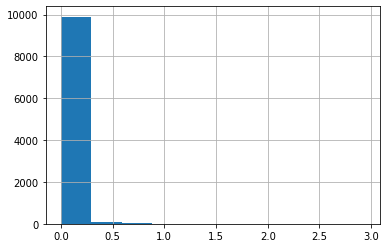

In [56]:
df['Negative'].hist()

# Predicting the stock movement using LSTM

A stock movement will be predicted using the past 100-day historical features including open, high, low, close, volumn, and the percent change from previous day. If the previous closing price is less than today's closing price, the stock went up and otherwise, it went down.

First, a 100-day window of features are put together to predict if the price goes up or down. For every stock, 80% of the prices are trained and the rest will be tested for validating its model performance.

## Preprocessing data

In [ ]:
def up_or_down(dfin):
  now = dfin['Close']
  future = dfin['Future']
  if float(now) > float(future):
    return 0
  else:
    return 1

df = df[df.columns[2:7]]
df['Future'] = df['Close'].shift(-1)
df['Close_pct_change'] = (df['Future'] - df['Close'])/df['Close']

df['Target'] = df.apply(up_or_down, axis=1)
df.dropna(axis=0, inplace=True)
df.drop(columns='Future', inplace=True)
df

,Open,High,Low,Close,Volume,Close_pct_change,Target
0,107.49,107.63,107.02,107.10,132737,0.002334,1
1,106.98,107.40,106.98,107.35,79673,0.002329,1
2,107.40,107.67,107.39,107.60,72395,-0.001115,0
3,107.47,107.60,107.37,107.48,47313,0.002977,1
4,107.68,107.84,107.64,107.80,35516,-0.004360,0
...,...,...,...,...,...,...,...
7199,155.26,155.26,155.22,155.22,500,0.000580,1
7200,154.82,155.39,154.81,155.31,62144,-0.000129,0
7201,155.16,155.34,155.12,155.29,52984,-0.001996,0
7202,155.02,155.07,154.83,154.98,108079,-0.002194,0


In [ ]:
x = np.array(df.iloc[:,:-1], dtype=np.float32)
scaler = MinMaxScaler()
scaler.fit(x)
x_trans = scaler.transform(x)
x_target = df['Target']
df = pd.DataFrame(x_trans,columns=df.columns[:-1])
df['Target'] = x_target
df
# xy = np.concatenate((xy_pr, xy[:,5:]), axis = 1)
# print(xy)

,Open,High,Low,Close,Volume,Close_pct_change,Target
0,0.032988,0.034969,0.027766,0.027653,0.029638,0.478101,1
1,0.025641,0.031659,0.027187,0.031273,0.017781,0.478057,1
2,0.031691,0.035545,0.033116,0.034892,0.016155,0.450275,0
3,0.032700,0.034537,0.032827,0.033155,0.010550,0.483288,1
4,0.035725,0.037991,0.036732,0.037788,0.007914,0.424101,0
...,...,...,...,...,...,...,...
7199,0.721118,0.720391,0.724801,0.724338,0.000089,0.463948,1
7200,0.714780,0.722262,0.718872,0.725641,0.013864,0.458232,0
7201,0.719677,0.721542,0.723355,0.725351,0.011817,0.443168,0
7202,0.717661,0.717657,0.719161,0.720863,0.024128,0.441574,0


In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Future,SMA100,Tartget,Open_pch,High_pch,Low_pch,Close_pch,Volume_pch,Future_pch
0,2017-07-03 12:00:00,PG,87.79,87.79,87.72,87.74,20186,87.78,NaN,1,0.000912,0.000342,0.000114,-0.000114,-0.573343,0.000456
1,2017-07-03 12:15:00,PG,87.71,87.80,87.71,87.78,99721,87.87,NaN,1,-0.000911,0.000114,-0.000114,0.000456,3.940107,0.001025
2,2017-07-03 12:30:00,PG,87.83,87.88,87.83,87.87,79955,87.87,NaN,1,0.001368,0.000911,0.001368,0.001025,-0.198213,0.000000
3,2017-07-03 12:45:00,PG,87.89,87.90,87.87,87.87,95487,87.74,NaN,0,0.000683,0.000228,0.000455,0.000000,0.194259,-0.001479
4,2017-07-03 13:00:00,PG,87.75,87.75,87.74,87.74,460452,87.74,NaN,1,-0.001593,-0.001706,-0.001479,-0.001479,3.822143,0.000000


In [ ]:
window_size = 100
batch_size = 300
split_time = int(df.shape[0]*.8)

seq = deque(maxlen = window_size)
seq_window = []
for val in df.values:
  seq.append([n for n in val[10:-1]])
  if len(seq) == window_size:
    seq_window.append([np.array(seq), val[9]])

random.shuffle(seq_window)

x_data = []
y_data = []
for seq, target in seq_window:
  x_data.append(seq)
  y_data.append(target)

# x_data = np.array(x_data)
print('X data:', len(x_data))
print('Y data:', len(y_data))
print('Y data value counts')
print(pd.Series(y_data).value_counts())

x_train = x_data[:split_time]
y_train = y_data[:split_time]
x_valid = x_data[split_time:]
y_valid = y_data[split_time:]
print('=====After splitting=====')
print('X train:', len(x_train))
print('X valid:', len(x_valid))
print('Y train value counts')
print(pd.Series(y_train).value_counts())
print('Y valid value counts')
print(pd.Series(y_valid).value_counts())


x_data =np.array(x_data).reshape(-1,window_size,5)
x_train = np.array(x_train).reshape(-1,window_size,5)
x_valid = np.array(x_valid).reshape(-1,window_size,5)
y_data = np.array(y_data).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_valid = np.array(y_valid).reshape(-1,1)

X data: 6949
Y data: 6949
Y data value counts
1    3697
0    3252
dtype: int64
=====After splitting=====
X train: 5638
X valid: 1311
Y train value counts
1    3013
0    2625
dtype: int64
Y valid value counts
1    684
0    627
dtype: int64


## Training data

In [ ]:
model = tf.keras.Sequential([
  # tf.keras.layers.SimpleRNN(50, input_shape=(x_train.shape[1:]), return_sequences=True, activation='relu'),
  # tf.keras.layers.SimpleRNN(50, activation='relu'),
  # tf.compat.v1.keras.layers.CuDNNLSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, input_shape=(x_train.shape[1:]),return_sequences=True)),  
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.BatchNormalization(),

  # tf.compat.v1.keras.layers.CuDNNLSTM(128),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(.3),
  tf.keras.layers.Dense(2, activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = batch_size, validation_data=(x_valid, y_valid), epochs=10)

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 1.0214 - accuracy: 0.4778 - val_loss: 0.6972 - val_accuracy: 0.4783
Epoch 2/10
19/19 [==============================] - 21s 1s/step - loss: 1.0068 - accuracy: 0.4768 - val_loss: 0.6979 - val_accuracy: 0.4783
Epoch 3/10
19/19 [==============================] - 21s 1s/step - loss: 1.0089 - accuracy: 0.4807 - val_loss: 0.6987 - val_accuracy: 0.4783
Epoch 4/10
19/19 [==============================] - 21s 1s/step - loss: 1.0126 - accuracy: 0.4736 - val_loss: 0.6998 - val_accuracy: 0.4783
Epoch 5/10
19/19 [==============================] - 21s 1s/step - loss: 0.9995 - accuracy: 0.4798 - val_loss: 0.7012 - val_accuracy: 0.4783
Epoch 6/10
19/19 [==============================] - 21s 1s/step - loss: 1.0097 - accuracy: 0.4782 - val_loss: 0.7027 - val_accuracy: 0.4783
Epoch 7/10
19/19 [==============================] - 21s 1s/step - loss: 0.9933 - accuracy: 0.4787 - val_loss: 0.7044 - val_accuracy: 0.4783
Epoch 8/10
19/19 [==

## Results

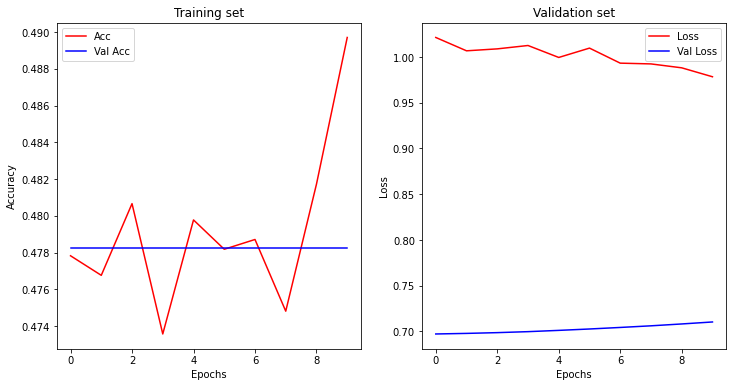

In [ ]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']
epochs=range(len(loss))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label = 'Acc')
plt.plot(epochs, val_acc, 'b', label = 'Val Acc')
plt.title('Training set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label = 'Loss')
plt.plot(epochs, val_loss, 'b', label = 'Val Loss')
plt.title('Validation set')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


Likewise, the accuracy is around 50%, which means it acts like a random walk. Further study is required to improve this model to boost up the accuracy.

# Predicting a closing price using RNN

A closing price will be predicted for a deep neural network model and compared with 100-day SMA for their efficiencies.

First, a 100-day window of prices are put together to estimate the next price and the window of prices are adjusted corresponding to prices that one wants to estimate. For every stock, 80% of the prices are trained and the rest will be tested for validating its model performance.

## Preprocessing data

In [ ]:
split_time = int(df.shape[0]*.8)
time = df.index.values
series = df['Close'].values
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 100
batch_size = 300
shuffle_buffer_size = 1000

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(4, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.batch(3).prefetch(1)
for x,y in dataset:
  print('x={}, y={}'.format(x.numpy(), y.numpy()))

x=[[0 1 2]
 [1 2 3]
 [2 3 4]], y=[[3]
 [4]
 [5]]
x=[[3 4 5]
 [4 5 6]
 [5 6 7]], y=[[6]
 [7]
 [8]]
x=[[6 7 8]], y=[[9]]


Text(0.5, 1.0, "PG's stock")

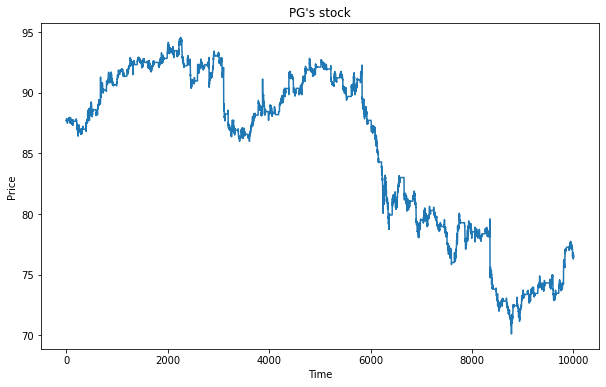

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(False)


plt.figure(figsize=(10,6))
plot_series(time,series)
plt.title("{}'s stock".format(df['Symbol'][0]))

A dataset is divided into the train, test test beforehand. A DNN has 3 hidden layers in which there are 100, 50, and 10 neurons for layers respectively and the RELU activation function is used. The wieghts are initialized to avoid vanishing the gradients due to the backpropagation.

### Why Initialize Weights


The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network. If either occurs, loss gradients will either be too large or too small to flow backwards beneficially, and the network will take longer to converge, if it is even able to do so at all.

When the matrix multiplication, several layers in deep neural nets, the product of this multiplication at one layer becomes the inputs of the subsequent layer, and so on and so forth. Numerous matrix multiplication may lead to vanishing/exploding gradients so one of weights initialization methods is applied(e.g., Xavier's)

### Sequence bias

Sequence bias is when the order of things can impact the selection of things. For example, if I were to ask you your favorite TV show, and listed "Game of Thrones", "Killing Eve", "Travellers" and "Doctor Who" in that order, you're probably more likely to select 'Game of Thrones' as you are familiar with it, and it's the first thing you see. Even if it is equal to the other TV shows. So, when training data in a dataset, we don't want the sequence to impact the training in a similar way, so it's good to shuffle them up.

## Training data

In [ ]:
tf.random.set_seed(1000)
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
  tf.keras.layers.SimpleRNN(50, return_sequences=True, activation='relu'),
  tf.keras.layers.SimpleRNN(50, activation='relu'),
  tf.keras.layers.Dense(1)#,
  # tf.keras.layers.Lambda(lambda x: x * 100.0) # act func: tan h from -1 to 1 so implemented
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

(1e-07, 0.0001, 0.0, 60.0)

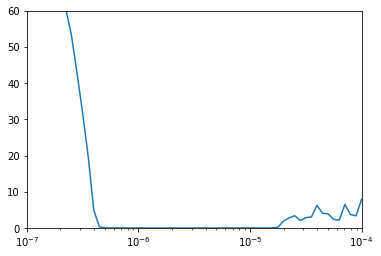

In [ ]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-7,1e-4,0,60])

In [ ]:
tf.random.set_seed(1000)
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
  tf.keras.layers.SimpleRNN(50, return_sequences=True, activation='relu'),
  tf.keras.layers.SimpleRNN(50, activation = 'relu'),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=20)

Epoch 1/20
27/27 [==============================] - 3s 108ms/step - loss: 97.3454 - mae: 97.8454
Epoch 2/20
27/27 [==============================] - 3s 107ms/step - loss: 75.5809 - mae: 76.0809
Epoch 3/20
27/27 [==============================] - 3s 106ms/step - loss: 49.7613 - mae: 50.2613
Epoch 4/20
27/27 [==============================] - 3s 108ms/step - loss: 16.5457 - mae: 17.0449
Epoch 5/20
27/27 [==============================] - 3s 107ms/step - loss: 1.8206 - mae: 2.2852
Epoch 6/20
27/27 [==============================] - 3s 107ms/step - loss: 0.1247 - mae: 0.4127
Epoch 7/20
27/27 [==============================] - 3s 107ms/step - loss: 0.0199 - mae: 0.1410
Epoch 8/20
27/27 [==============================] - 3s 108ms/step - loss: 0.0146 - mae: 0.0997
Epoch 9/20
27/27 [==============================] - 3s 106ms/step - loss: 0.0145 - mae: 0.0974
Epoch 10/20
27/27 [==============================] - 3s 107ms/step - loss: 0.0145 - mae: 0.0989
Epoch 11/20
27/27 [======================

## Results

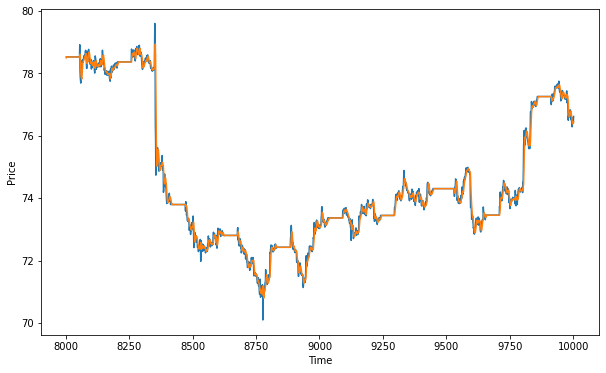

In [ ]:
forecast = []
for time in range(len(df) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_squared_error(x_valid, results).numpy()

0.03692209

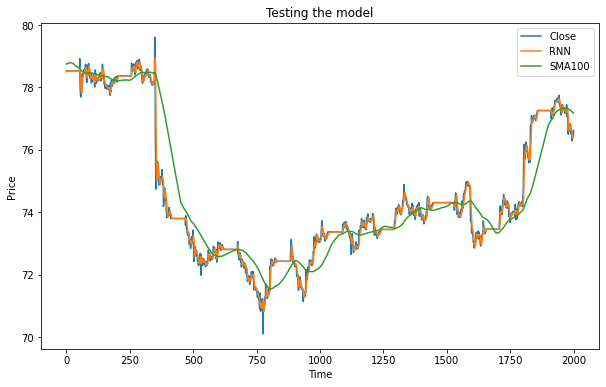

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_valid, label ='Close')
plt.plot(np.array(forecast).reshape(-1), label = 'RNN')
plt.plot(df['SMA100'].values[split_time:], label = 'SMA100')
plt.title('Testing the model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

0.03692209


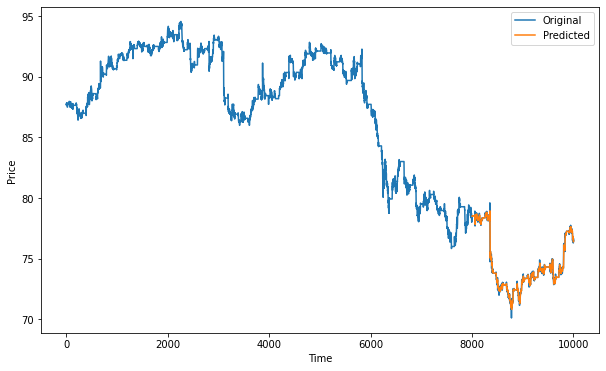

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(series)
plot_series(time_valid, results)
plt.legend(['Original','Predicted'])

<Figure size 432x288 with 0 Axes>

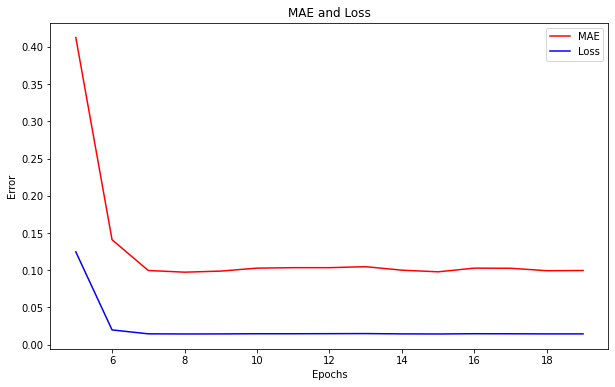

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
mae=history.history['mae']
loss=history.history['loss']
epochs=range(len(loss))
plt.plot(epochs[5:], mae[5:], 'r')
plt.plot(epochs[5:], loss[5:], 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(["MAE", "Loss"])
plt.figure()

# Predicting a closing price using LSTM

In [ ]:
tf.random.set_seed(1000)
np.random.seed(1000)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1)#,
  # tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

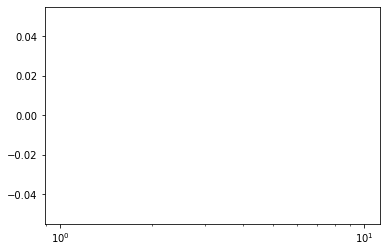

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(1000)
np.random.seed(1000)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=4e-7, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=100)

Epoch 1/100
27/27 [==============================] - 10s 384ms/step - loss: 470.4099 - mae: 18.1732
Epoch 2/100
27/27 [==============================] - 10s 382ms/step - loss: 119.5998 - mae: 9.3220
Epoch 3/100
27/27 [==============================] - 10s 388ms/step - loss: 48.7155 - mae: 6.0406
Epoch 4/100
27/27 [==============================] - 10s 385ms/step - loss: 42.2546 - mae: 5.6707
Epoch 5/100
27/27 [==============================] - 10s 386ms/step - loss: 43.7883 - mae: 5.7560
Epoch 6/100
27/27 [==============================] - 10s 383ms/step - loss: 41.6024 - mae: 5.6063
Epoch 7/100
27/27 [==============================] - 10s 384ms/step - loss: 42.2534 - mae: 5.6422
Epoch 8/100
27/27 [==============================] - 10s 381ms/step - loss: 40.9876 - mae: 5.5382
Epoch 9/100
27/27 [==============================] - 10s 384ms/step - loss: 40.0972 - mae: 5.5036
Epoch 10/100
27/27 [==============================] - 10s 388ms/step - loss: 39.1368 - mae: 5.4203
Epoch 11/100
27/

Still improving as the epochs get greater

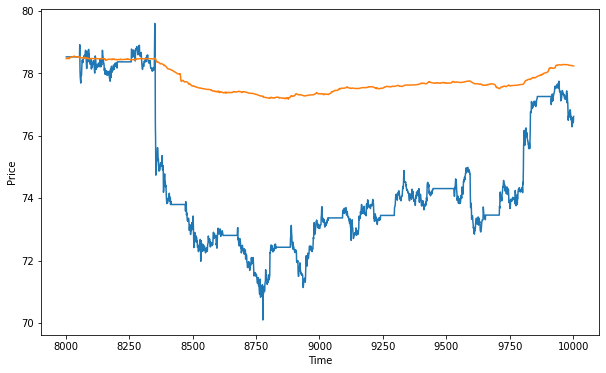

In [ ]:
forecast = []
for time in range(len(df) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

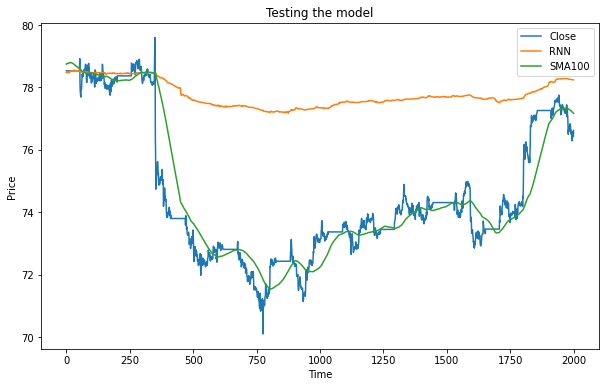

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_valid, label ='Close')
plt.plot(np.array(forecast).reshape(-1), label = 'LSTM')
plt.plot(df['SMA100'].values[split_time:], label = 'SMA100')
plt.title('Testing the model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
# print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
# plt.figure(figsize=(10, 6))
# plt.plot(series)
# plot_series(time_valid, results)
# plt.legend(['Original','Predicted'])

<Figure size 432x288 with 0 Axes>

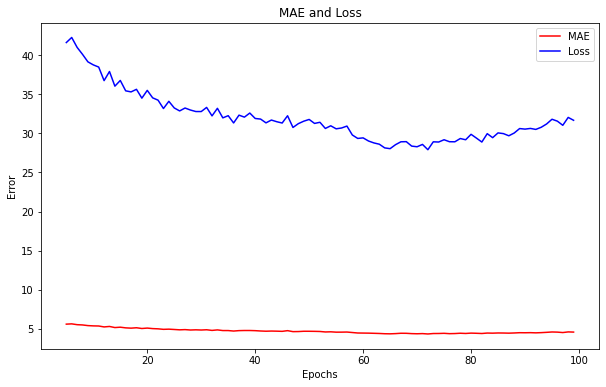

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss = history.history['loss']
# epochs = range(len(loss))

# plt.plot(epochs[50:], loss[50:], 'b')
# plt.title('Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["Loss"])

plt.figure(figsize=(10, 6))
mae=history.history['mae']
loss=history.history['loss']
epochs=range(len(loss))
plt.plot(epochs[5:], mae[5:], 'r')
plt.plot(epochs[5:], loss[5:], 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(["MAE", "Loss"])
plt.figure()

# Predicting a closing price using DNN


A closing price will be predicted for a deep neural network model and compared with 100-day SMA for their efficiencies.


First, a 100-day window of prices are put together to estimate the next price and the window of prices are adjusted corresponding to prices that one wants to estimate. For every stock, 80% of the prices are trained and the rest will be tested for validating its model performance.

In [ ]:
tf.random.set_seed(1000)
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu", kernel_initializer='glorot_normal'), 
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer='glorot_normal'),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
history = model.fit(dataset, epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 15,671
Trainable params: 15,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
27/27 [==============================] - 2s 59ms/step - loss: 61.4000
Epoch 2/100
27/27 [==============================] - 2s 62ms/step - loss: 3.5982
Epoch 3/100
27/27 [==============================] - 2s 63ms/step - loss: 0.5720
Epoc

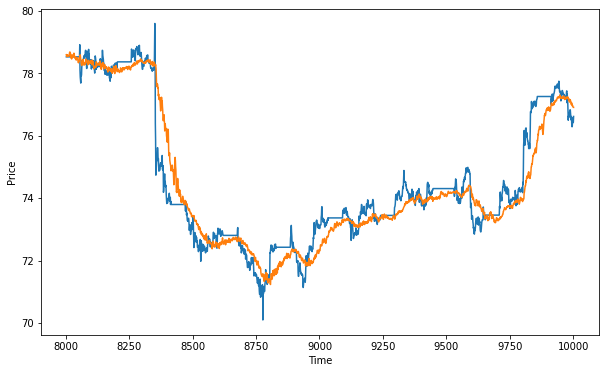

In [ ]:
forecast = []
for time in range(len(df) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

0.52166075


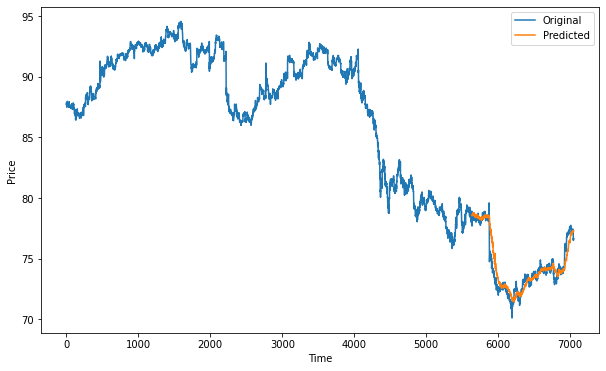

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
plt.figure(figsize=(10, 6))
plt.plot(series)
plot_series(time_valid, results)
plt.legend(['Original','Predicted'])

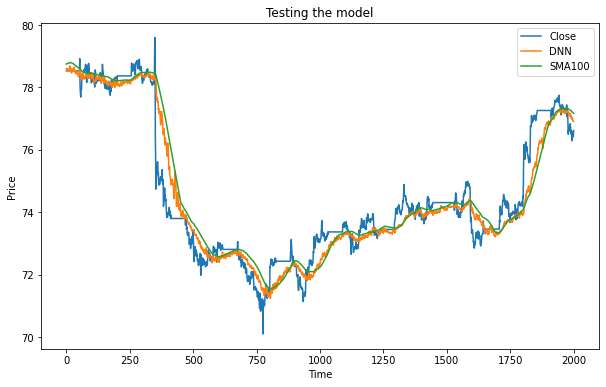

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_valid, label = 'Close')
plt.plot(np.array(forecast).reshape(-1), label = 'DNN')
plt.plot(df['SMA100'].values[split_time:], label = 'SMA100')
plt.title('Testing the model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

<Figure size 432x288 with 0 Axes>

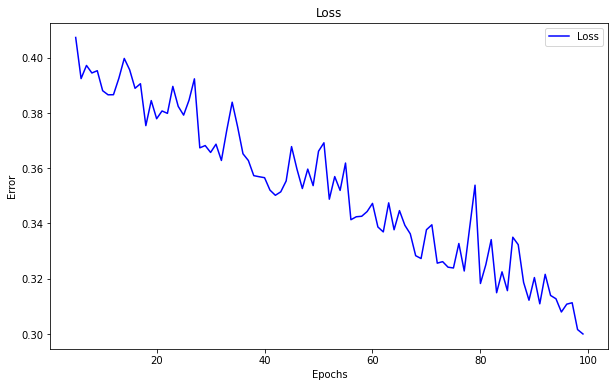

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(figsize=(10, 6))
# mae=history.history['mae']
loss=history.history['loss']
epochs=range(len(loss))
# plt.plot(epochs[5:], mae[5:], 'r')
plt.plot(epochs[5:], loss[5:], 'b')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
# plt.legend(["MAE", "Loss"])
plt.legend(["Loss"])
plt.figure()
# loss = history.history['loss']
# epochs = range(len(loss))

# plt.plot(epochs[50:], loss[50:], 'b')
# plt.title('Loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["Loss"])

## Results

Oviously, the DNN model outperforms the the simple moving average method in predicting closing prices with the mean squred error of 3.046. The price series of DNN looks over-priced than the original overall so further study should be continued to fix this.

# Normalization

In [ ]:
xy = np.array(df.iloc[:,2:-1], dtype=np.float32)
scaler = MinMaxScaler()
scaler.fit(xy[:,:5])
xy_pr=scaler.transform(xy[:,:5])
xy = np.concatenate((xy_pr, xy[:,5:]), axis = 1)
print(xy)

[[0.         0.         0.00291538 ... 0.11061667 0.28565    0.18173334]
 [0.00858927 0.         0.         ... 0.305      0.027      0.085     ]
 [0.01078224 0.00516605 0.01658154 ... 0.268      0.37       0.374     ]
 ...
 [0.9448099  0.94557214 0.94515324 ... 0.342      0.489      0.297     ]
 [0.94645476 0.94483423 0.93549585 ... 0.342      0.489      0.297     ]
 [0.9371345  0.95110726 0.94023323 ... 0.16333333 0.8796667  0.269     ]]


In [ ]:
# xy = np.array(df.iloc[:,1:], dtype=np.float32)
xy.shape

(9763, 105)

In [ ]:
# xy = np.array(
#     [
#         [828.659973, 833.450012, 908100, 828.349976, 831.659973],
#         [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
#         [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
#         [816, 820.958984, 1008100, 815.48999, 819.23999],
#         [819.359985, 823, 1188100, 818.469971, 818.97998],
#         [819, 823, 1198100, 816, 820.450012],
#         [811.700012, 815.25, 1098100, 809.780029, 813.669983],
#         [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
#     ]
# )

# def min_max_scaler(data):
#     numerator = data - np.min(data, 0)
#     denominator = np.max(data, 0) - np.min(data, 0)
#     # noise term prevents the zero division
#     return numerator / (denominator + 1e-7)# * (max-min) + min

# xy = min_max_scaler(xy)
# scaler = MinMaxScaler()
# scaler.fit(xy)
# xy=scaler.transform(xy)
print(xy[:,:5])

# '''
# [[0.99999999 0.99999999 0.         1.         1.        ]
#  [0.70548491 0.70439552 1.         0.71881782 0.83755791]
#  [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
#  [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
#  [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
#  [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
#  [0.11436064 0.         0.20652174 0.22007776 0.18597238]
#  [0.         0.07747099 0.5326087  0.         0.        ]]
# '''

[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02
  8.31659973e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02
  8.28070007e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02
  8.24159973e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02
  8.19239990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02
  8.18979980e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02
  8.20450012e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02
  8.13669983e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02
  8.09559998e+02]]


In [ ]:
print(int(len(xy) * .9))
print(len(xy))

8786
9763


In [ ]:
split_time1 = int(len(xy) * .7)
split_time2 = int(len(xy) * .9)
train_set = xy[:split_time1,:]
valid_set = xy[split_time1:split_time2,:]
test_set = xy[split_time2:,:]


x_train = train_set[:,1:]
y_train = train_set[:,0]
x_val = valid_set[:,1:]
y_val = valid_set[:,0]
x_test = test_set[:,1:]
y_test = test_set[:,0]

y_train = y_train.reshape(-1,1).astype(np.float32)
y_val = y_val.reshape(-1,1).astype(np.float32)
y_test = y_test.reshape(-1,1).astype(np.float32)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(6834, 104)
(6834, 1)
(1952, 104)
(1952, 1)
(977, 104)
(977, 1)


In [ ]:
x_train

array([[0.        , 0.00291538, 0.        , ..., 0.11061667, 0.28565   ,
        0.18173334],
       [0.        , 0.        , 0.00202823, ..., 0.305     , 0.027     ,
        0.085     ],
       [0.00516605, 0.01658154, 0.00719142, ..., 0.268     , 0.37      ,
        0.374     ],
       ...,
       [0.5182657 , 0.5102043 , 0.51687264, ..., 0.367     , 0.332     ,
        0.128     ],
       [0.52029514, 0.5102043 , 0.50838995, ..., 0.268     , 0.3658    ,
        0.3558    ],
       [0.51107025, 0.5102043 , 0.5045178 , ..., 0.268     , 0.3658    ,
        0.3558    ]], dtype=float32)

# Support Vector Machine


Support vector regression (SVR) is a statistical method that examines the linear relationship between two continuous variables.

In regression problems, we generally try to find a line that best fits the data provided. The equation of the line in its simplest form is described as below y=mx +c. In the case of regression using a support vector machine, we do something similar but with a slight change. Here we define a small error value e (error = prediction - actual).

The value of e determines the width of the error tube (also called insensitive tube). The value of e determines the number of support vectors, and a smaller e value indicates a lower tolerance for error.
Thus, we try to find the line’s best fit in such a way that:
(mx+c)-y ≤ e and y-(mx+c) ≤ e

Also, we do not care about errors as long, as they are less than e. So in this case, only those data points that are outside the e error region will be contributing to the final cost calculation.

For example, if we’re dealing with stock trading, and we want to minimize the trading loss, but we do not care about loss as long as they are less than a certain value (e).

Hence, the support vector regression model depends only on a subset of the training data points, as the cost function of the model ignores any training data close to the model prediction when the error is less than e.

In the realm of machine learning, a support vector regression algorithm can, in some cases, be more suitable for regression problems than other common and popular algorithms. Below are the cases where a support vector regression is advantageous over other regression algorithms:

SVM is memory efficient, which means it takes a relatively lower amount of calculation resources to train the model. This is because presenting the solution by means of a small subset of training points gives enormous computational advantages.

There are non-linear or complex relationships between features and labels. This is because we have the option to convert non-linear relationships to higher-dimensional problems in the case of support vector regression.

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Future,SMA100,Tartget,Open_pch,High_pch,Low_pch,Close_pch,Volume_pch,Future_pch
0,2017-07-03 09:45:00,PG,87.56,87.72,87.54,87.72,139726.0,87.66,NaN,0,0.001831,0.002285,0.004129,0.003432,-0.544082,-0.000684
1,2017-07-03 10:00:00,PG,87.75,87.78,87.59,87.66,90628.0,87.68,NaN,1,0.002170,0.000684,0.000571,-0.000684,-0.351388,0.000228
2,2017-07-03 10:15:00,PG,87.76,87.76,87.61,87.68,68037.0,87.77,NaN,1,0.000114,-0.000228,0.000228,0.000228,-0.249272,0.001026
3,2017-07-03 10:30:00,PG,87.70,87.77,87.69,87.77,44656.0,87.71,NaN,0,-0.000684,0.000114,0.000913,0.001026,-0.343651,-0.000684
4,2017-07-03 10:45:00,PG,87.62,87.71,87.62,87.71,25761.0,87.83,NaN,1,-0.000912,-0.000684,-0.000798,-0.000684,-0.423123,0.001368


In [ ]:
y_data = np.array(df['Future_pch'], dtype=np.float32)
x_data = np.array(df.iloc[:,10:-1])
# x_data = np.array(df.iloc[:,10:-1])
y_train = y_data[:split_time]
x_train = x_data[:split_time]
y_valid = y_data[split_time:]
x_valid = x_data[split_time:]

In [ ]:
# defining parameter range
param_grid = {'C': [.0001, .001, .01, 0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly']}

svr_model_cv = GridSearchCV(SVR(), param_grid, verbose = 3) 
svr_model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ..... C=0.0001, gamma=1, kernel=rbf, score=-13.496, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ..... C=0.0001, gamma=1, kernel=rbf, score=-32.481, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ...... C=0.0001, gamma=1, kernel=rbf, score=-0.318, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ...... C=0.0001, gamma=1, kernel=rbf, score=-7.549, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ...... C=0.0001, gamma=1, kernel=rbf, score=-6.537, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] .... C=0.0001, gamma=1, kernel=poly, score=-13.496, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] .... C=0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.001, gamma=0.01, kernel=rbf, score=-32.481, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .... C=0.001, gamma=0.01, kernel=rbf, score=-0.318, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .... C=0.001, gamma=0.01, kernel=rbf, score=-7.549, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] .... C=0.001, gamma=0.01, kernel=rbf, score=-6.537, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .. C=0.001, gamma=0.01, kernel=poly, score=-13.496, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .. C=0.001, gamma=0.01, kernel=poly, score=-32.481, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] ... C=0.001, gamma=0.01, kernel=poly, score=-0.318, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=poly ................................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(svr_model_cv.best_params_)
print(svr_model_cv.best_estimator_)

{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=0.0001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
svr_model = SVR().set_params(**svr_model_cv.best_params_)
svr_model.fit(x_train, y_train)
print(svr_model.score(x_train,y_train))

-8.58282893358844


In [ ]:
svr_model_cv.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
df['Future_pch_predicted_SVR'] = svr_model.predict(x_data)
df['Future_pred_SVR'] = df['Future_pch_predicted_SVR'] * df['Close'] + df['Close']

from sklearn.metrics import mean_squared_error

print('R squared coeff for whole data: {}'.format(svr_model.score(x_data,y_data)))
print('R squared coeff for train data: {}'.format(svr_model.score(x_train,y_train)))
print('R squared coeff for test data: {}'.format(svr_model.score(x_valid,y_valid)))
print('------------------------------------')
print('Mean squared error: {}'.format(mean_squared_error(df['Future'].to_numpy()[:-1],df['Future_pred_SVR'].to_numpy()[:-1])))

R squared coeff for whole data: -7.924647479398958
R squared coeff for train data: -8.58282893358844
R squared coeff for test data: -6.063503712463046
------------------------------------
Mean squared error: 0.16429882586937614


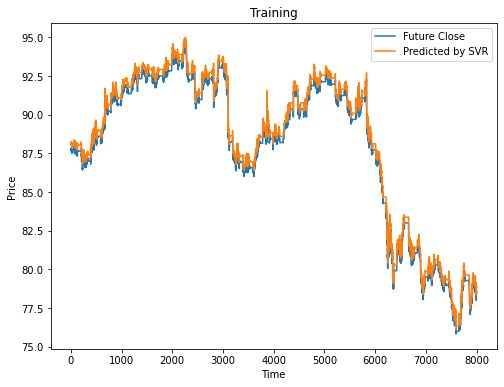

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df['Future'][:split_time], label = 'Future Close')
plt.plot(df['Future_pred_SVR'][:split_time], label = 'Predicted by SVR')
plt.title('Training')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

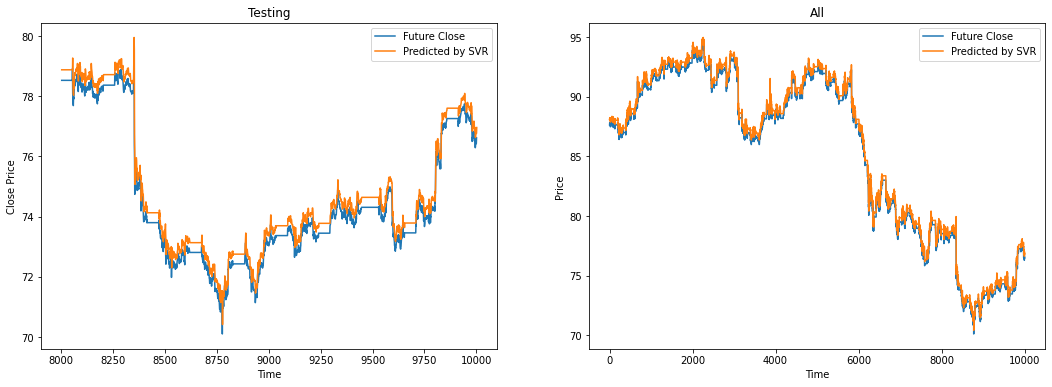

In [ ]:
# %matplotlib inline
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(df['Future'][split_time:], label = 'Future Close')
plt.plot(df['Future_pred_SVR'][split_time:], label = 'Predicted by SVR')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Testing')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['Future'], label = 'Future Close')
plt.plot(df['Future_pred_SVR'], label = 'Predicted by SVR')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('All')
plt.legend()

### Reference

In [ ]:
svr_rbf = SVR(kernel = 'rbf', C=100, gamma = .0001)
svr_rbf.fit(x_train, y_train)
print(svr_rbf.score(x_train,y_train))

ValueError: ignored

In [ ]:
print(np.array(svr_rbf.predict(x_train)))#.reshape(-1,1))
print(y_train.reshape(-1,))

[139.84715941 139.85766646 140.19964126 ... 178.55861656 178.2436105
 178.33683895]
[139.85 139.96 140.24 ... 178.62 178.33 178.42]


In [ ]:
tf.keras.metrics.mean_squared_error(y_train.reshape(-1,), np.array(svr_rbf.predict(x_train))).numpy()

0.012218363654355783

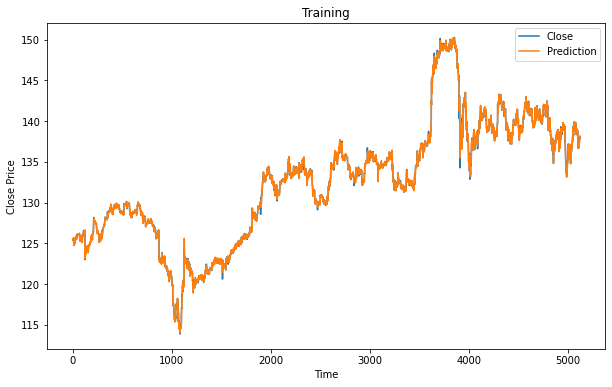

In [ ]:
# plt.style.use('fivethirtyeight')
# plt.style.use('default')
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Close')
plt.plot(svr_rbf.predict(x_train), label = 'Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Training')
plt.legend()

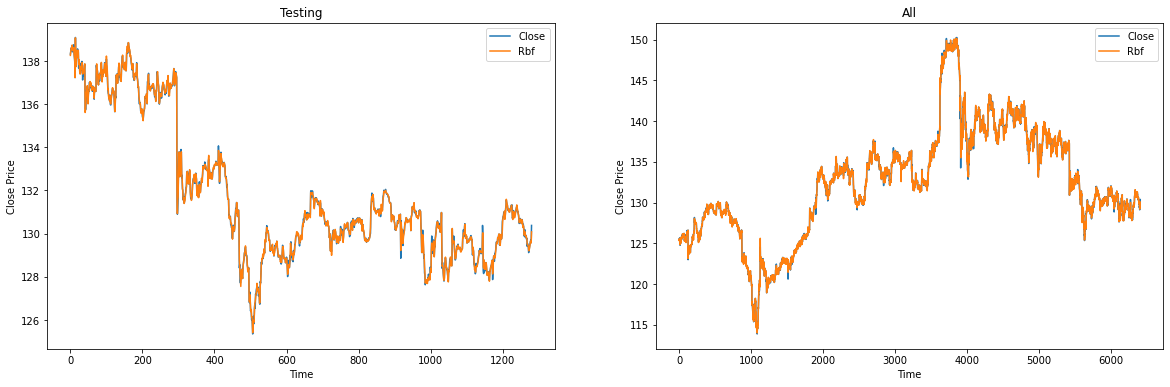

In [ ]:
# %matplotlib inline
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_valid, label = 'Close')
plt.plot(svr_rbf.predict(x_valid), label = 'Rbf')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Testing')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_data, label = 'Close')
plt.plot(svr_rbf.predict(x_data), label = 'Rbf')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('All')
plt.legend()



In [ ]:
print(svr_rbf.score(x_train,y_train))
print(svr_rbf.score(x_valid,y_valid))

0.9997717211432601
0.9991538257874404


## Insights

Support vector regression gives a better prediction than the DNN with 99% accuracy when training the model, which means that there is a posibility of overfitting the data a bit. This is supported by the prediction accuracy of 93% when testing the model. This shows that the test performance of SVR model seems perfectly fitted until about time 1100 and the errors start getting greater as it goes to the future prediction.

# Neural Network
regularization l2: .01

kernel regularization max-norm: max_value=1

dropout: .5

Ne for first layer: [64, 128, 256]

learning rate: [.001, .0001]

Adam: epsilon=10e-08, beta1=.9, beta2=.999


In [ ]:
print(x_train)
print(x_valid)

[[139.42 140.   139.26]
 [139.89 140.   139.1 ]
 [140.01 140.28 140.01]
 ...
 [178.54 178.66 178.54]
 [178.25 178.35 178.19]
 [178.42 178.42 178.39]]
[[178.52 178.58 178.4 ]
 [178.64 178.74 178.61]
 [178.65 178.65 178.65]
 ...
 [191.12 191.25 190.97]
 [191.21 191.21 190.44]
 [190.7  191.55 190.7 ]]


In [ ]:
print(y_train.reshape(-1,1))
print(y_valid.reshape(-1,1))

[[139.85]
 [139.96]
 [140.24]
 ...
 [178.62]
 [178.33]
 [178.42]]
[[178.57]
 [178.61]
 [178.65]
 ...
 [191.21]
 [190.71]
 [190.71]]


In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(x_data)
x_data_scaled = x_scaler.transform(x_data)

y_scaler = MinMaxScaler()
y_scaler.fit(y_data.reshape(-1,1))
y_data_scaled = y_scaler.transform(y_data.reshape(-1,1))

y_train_scaled = y_data_scaled[:split_time]
x_train_scaled = x_data_scaled[:split_time,:]
y_valid_scaled = y_data_scaled[split_time:]
x_valid_scaled = x_data_scaled[split_time:,:]

In [ ]:
x_data

array([[139.42, 140.  , 139.26],
       [139.89, 140.  , 139.1 ],
       [140.01, 140.28, 140.01],
       ...,
       [191.12, 191.25, 190.97],
       [191.21, 191.21, 190.44],
       [190.7 , 191.55, 190.7 ]])

In [ ]:
x_scaler.inverse_transform(x_data_scaled)

array([[139.42, 140.  , 139.26],
       [139.89, 140.  , 139.1 ],
       [140.01, 140.28, 140.01],
       ...,
       [191.12, 191.25, 190.97],
       [191.21, 191.21, 190.44],
       [190.7 , 191.55, 190.7 ]])

In [ ]:
!pip install -U keras-tuner

from kerastuner.tuners import RandomSearch

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [ ]:
# random.seed(777)  # for reproducibility
learning_rate = 0.001
# learning_rate = [0.001, .0001]
l2_reg = .01
max_value = 1
batch_size = 100
training_epochs = 100
# nb_classes = 10
drop_rate = .5
# Ne = [64, 128, 256]
Ne = 128



tf.random.set_seed(1000)

def tuning_model(hp):
  model = tf.keras.Sequential([
                               tf.keras.layers.Dense(Ne, input_shape=(3,), activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(drop_rate),
                               tf.keras.layers.Dense(Ne/2, activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(drop_rate),
                               tf.keras.layers.Dense(Ne/4, activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                               tf.keras.layers.BatchNormalization(),
                               tf.keras.layers.Dropout(drop_rate),
                               tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')
                               ])
  lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
  model.compile(loss= 'mse',
                optimizer=tf.keras.optimizers.Adam(lr=lr))#, epsilon=epsilon),#beta_1=beta1, beta_2=beta2, ),
                # metrics=['accuracy'])
  return model

MAX_TRIALS = 20
EXECUTIONS_PER_TRIAL = 5
tuner = RandomSearch(
    tuning_model,
    objective='loss',
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    # ,
    # directory='test_dir',
    project_name='tune_optimizer'
    # seed=RANDOM_SEED
)

In [ ]:
tuner.search(x_train,y_train,epochs=2)

Epoch 1/2
161/161 [==============================] - 0s 3ms/step - loss: 17465.6953
Epoch 2/2
161/161 [==============================] - 0s 3ms/step - loss: 17418.2207
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17465.6426
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17417.8398
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17463.7988
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17421.6191
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17458.0605
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17420.6445
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17459.4746
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17428.0801


Epoch 1/2
161/161 [==============================] - 0s 3ms/step - loss: 17501.3379
Epoch 2/2
161/161 [==============================] - 0s 3ms/step - loss: 17489.3418
Epoch 1/2
161/161 [==============================] - 0s 3ms/step - loss: 17488.7598
Epoch 2/2
161/161 [==============================] - 1s 3ms/step - loss: 17477.9590
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17494.2422
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17486.0742
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17492.4629
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17484.3066
Epoch 1/2
161/161 [==============================] - 0s 2ms/step - loss: 17491.5215
Epoch 2/2
161/161 [==============================] - 0s 2ms/step - loss: 17482.7285


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.oracle.get_best_trials()[0].hyperparameters.values

{'learning_rate': 0.01}

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

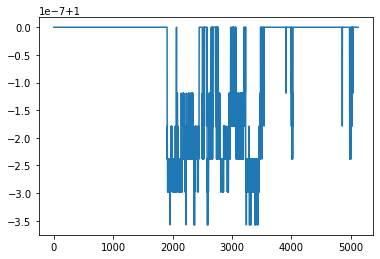

In [ ]:
plt.plot(best_model.predict(x_train))

In [ ]:
x_train.shape

(5638, 5)

In [ ]:
# random.seed(777)  # for reproducibility
learning_rate = 0.001
# learning_rate = [0.001, .0001]
l2_reg = .01
max_value = 1
batch_size = 100
training_epochs = 100
# nb_classes = 10
drop_rate = .5
# Ne = [64, 128, 256]
Ne = 128

# smote = SMOTE()
# X_train_smote, Y_train_smote = smote.fit_sample(x_train,y_train)
# X_val_smote, Y_val_smote = smote.fit_sample(x_val,y_val)


# y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
# y_test = tf.keras.utils.to_categorical(y_test, nb_classes)
tf.random.set_seed(1000)


dnn_model = tf.keras.Sequential([
                              tf.keras.layers.Dense(Ne, input_shape=(x_train.shape[1:]), activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(drop_rate),
                              tf.keras.layers.Dense(Ne/2, activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(drop_rate),
                              tf.keras.layers.Dense(Ne/4, activation=tf.keras.layers.LeakyReLU(), kernel_initializer='glorot_normal'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Dropout(drop_rate),
                              tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_normal')
                              ])
lr = 1e-2
dnn_model.compile(loss= 'mse',
              optimizer=tf.keras.optimizers.Adam(lr=lr))#, epsilon=epsilon),#beta_1=beta1, beta_2=beta2, ),
              # metrics=['accuracy'])
dnn_model.summary()

history = dnn_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    verbose = 1,
                    epochs=training_epochs,
                    validation_data=(x_valid,y_valid)
                    )
  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               768       
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

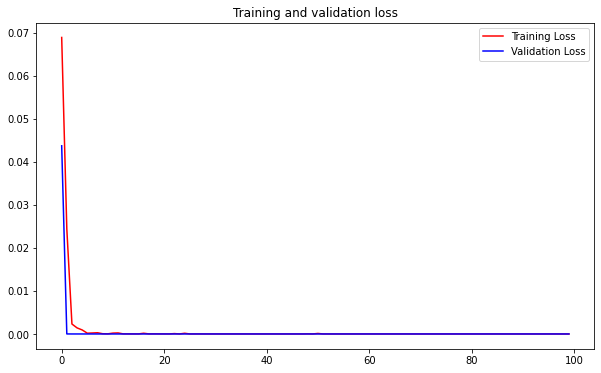

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

# plt.plot(epochs, acc, 'bo', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')

# plt.figure()

plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
df['Future_pch_predicted_DNN'] = dnn_model.predict(x_data)
df['Future_pred_DNN'] = df['Future_pch_predicted_DNN'] * df['Close'] + df['Close']

print('------------------------------------')
print('Mean squared error: {}'.format(mean_squared_error(df['Future'].to_numpy()[:-1],df['Future_pred_DNN'].to_numpy()[:-1])))

------------------------------------
Mean squared error: 0.02512710411897338


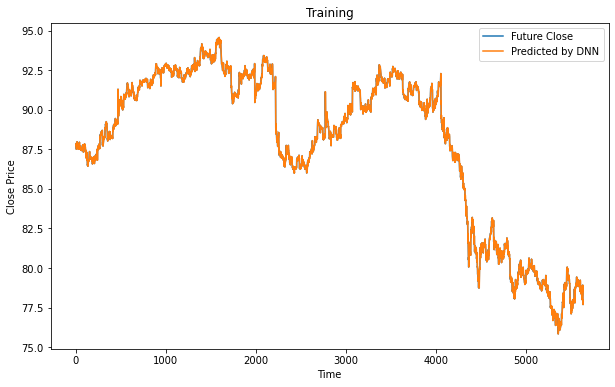

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Future'][:split_time], label = 'Future Close')
plt.plot(df['Future_pred_DNN'][:split_time], label = 'Predicted by DNN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Training')
plt.legend()

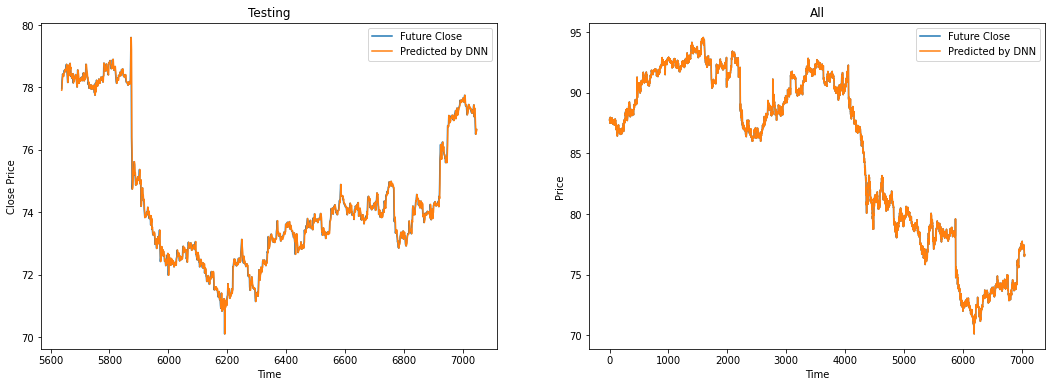

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(df['Future'][split_time:], label = 'Future Close')
plt.plot(df['Future_pred_DNN'][split_time:], label = 'Predicted by DNN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Testing')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['Future'], label = 'Future Close')
plt.plot(df['Future_pred_DNN'], label = 'Predicted by DNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('All')
plt.legend()

# Random Forest

When the price is not observed in the training set but in the test set, the predicted price would be not correct. Therefore, the percent increase for each feature is considered to calcuate the future price percent increase and then finalize it with the predicted future price.

In [ ]:
y_data = np.array(df['Future_pch'], dtype=np.float32)
x_data = np.array(df.iloc[:,10:-1])
y_train = y_data[:split_time]
x_train = x_data[:split_time]
y_valid = y_data[split_time:]
x_valid = x_data[split_time:]

In [ ]:
rf_model = RandomForestRegressor(random_state=100)
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model_cv = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
rf_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
print(rf_model_cv.best_params_)
print(rf_model_cv.best_score_)

{'max_features': 'auto', 'n_estimators': 400}
0.966305569698037


In [ ]:
rf_model = RandomForestRegressor().set_params(**rf_model_cv.best_params_)
rf_model.fit(x_train,y_train)

df['Future_pch_predicted_RF'] = rf_model.predict(x_data)
df['Future_pred_RF'] = df['Future_pch_predicted_RF'] * df['Close'] + df['Close']

from sklearn.metrics import mean_squared_error

print('R squared coeff for whole data: {}'.format(rf_model.score(x_data,y_data)))
print('R squared coeff for train data: {}'.format(rf_model.score(x_train,y_train)))
print('R squared coeff for test data: {}'.format(rf_model.score(x_valid,y_valid)))
print('------------------------------------')
print('Mean squared error: {}'.format(mean_squared_error(df['Future'].to_numpy()[:-1],df['Future_pred_RF'].to_numpy()[:-1])))

R squared coeff for whole data: 0.9797295648603637
R squared coeff for train data: 0.990337180504662
R squared coeff for test data: 0.9497341911318213
------------------------------------
Mean squared error: 0.0003454265499759849


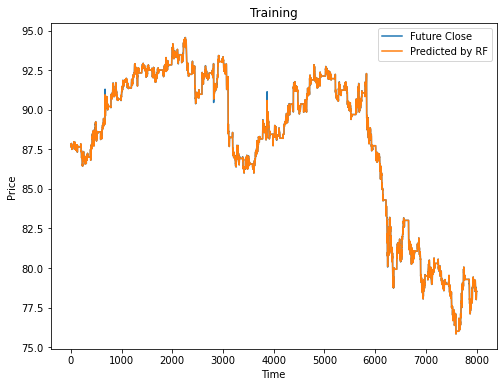

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df['Future'][:split_time], label = 'Future Close')
plt.plot(df['Future_pred_RF'][:split_time], label = 'Predicted by RF')
plt.title('Training')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

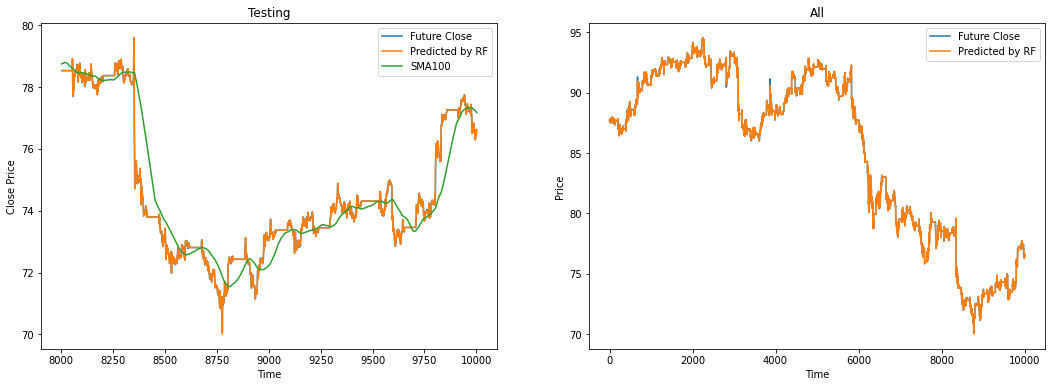

In [ ]:
# %matplotlib inline
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(df['Future'][split_time:], label = 'Future Close')
plt.plot(df['Future_pred_RF'][split_time:], label = 'Predicted by RF')
plt.plot(df['SMA100'][split_time:], label = 'SMA100')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Testing')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['Future'], label = 'Future Close')
plt.plot(df['Future_pred_RF'], label = 'Predicted by RF')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('All')
plt.legend()

### Reference

In [ ]:
CV_rfc.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=100)
param_grid = {
    'n_estimators': [200,400,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8]
}
rf_model_cv = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
rf_model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=100,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [ ]:
rf_model = RandomForestRegressor().set_params(**rf_model_cv.best_params_)
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_valid,y_valid))

0.9998417881636115
0.9985131689031406


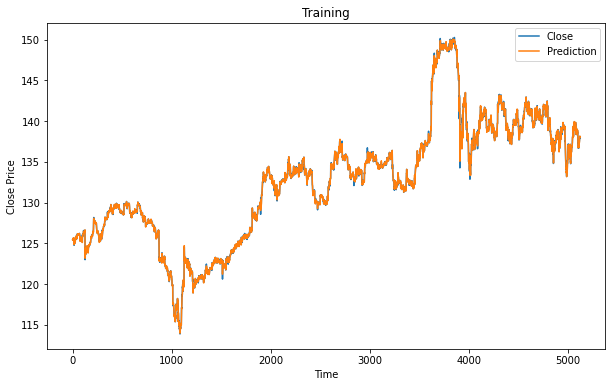

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Close')
plt.plot(rf_model.predict(x_train), label = 'Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Training')
plt.legend()

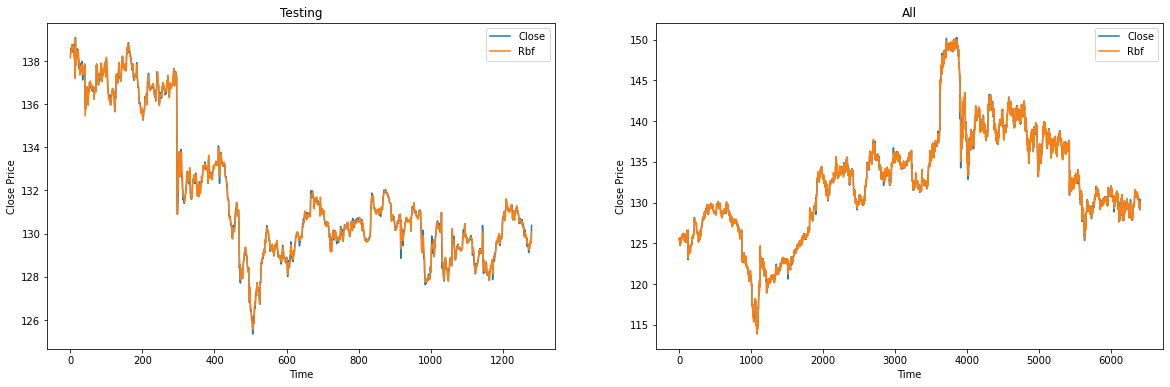

In [ ]:
# %matplotlib inline
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(y_valid, label = 'Close')
plt.plot(rf_model.predict(x_valid), label = 'Rbf')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Testing')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_data, label = 'Close')
plt.plot(rf_model.predict(x_data), label = 'Rbf')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('All')
plt.legend()

In [ ]:
import json

movie = "[{'id': 13, 'name': 'ae'}, {'id': 16, 'name': 'Animation'}]".replace('\'','"')

json.loads(movie)

[{'id': 13, 'name': 'ae'}, {'id': 16, 'name': 'Animation'}]

In [ ]:
for j in json.loads(movie):
  print(j['id'])

13
16


# Buy Sell Indicator

In [ ]:
def buy_sell(data):
  signal_buy = []
  signal_sell = []
  flag = -1
  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        signal_buy.append(data['AAPL'][i])
        signal_sell.append(np.nan)
        flag = 1
      else:
        signal_buy.append(np.nan)
        signal_sell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        signal_buy.append(np.nan)
        signal_sell.append(data['AAPL'][i])
        flag = 0
      else:
        signal_buy.append(np.nan)
        signal_sell.append(np.nan)
    else:
      signal_buy.append(np.nan)
      signal_sell.append(np.nan)
  
  return signal_buy, signal_sell

buy_sell_data = buy_sell(data)
data['Buy signal'] = buy_sell_data[0]
data['Sell signal'] = buy_sell_data[1]

# Clean Up
Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

# Reference


https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79